
Primeiro vamos importar algumas bibliotecas que vamos utilizar
<br>
Pandas é uma biblioteca útil para manipular e análisar dados em Dataframes
<br>
Numpy é uma biblioteca que serve para fazer operações com os dados
<br>
E matplotlib é uma biblioteca útil para visualizar dados 



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Nesse bloco carregamos o arquivo com os dados e o transformamos em um array onde cada posição é uma linha 

In [ ]:
data = []
with open('wifi_localization.txt') as wifi_file:
  for line in wifi_file:
    line = line.split("\t")
    line[-1] = line[-1][0:-1]
    line = [int(i) for i in line]
    data.append(line)

Nesse bloco transformamos os dados em um dataframe

In [ ]:
columns = ['Signal {}'.format(i) for i in range(1,8)]
columns.append('Room')
df = pd.DataFrame(data)
df.columns = columns

Visualizando os dados no dataframe

In [ ]:
df.head()

,Signal 1,Signal 2,Signal 3,Signal 4,Signal 5,Signal 6,Signal 7,Room
0,-64,-56,-61,-66,-71,-82,-81,1
1,-68,-57,-61,-65,-71,-85,-85,1
2,-63,-60,-60,-67,-76,-85,-84,1
3,-61,-60,-68,-62,-77,-90,-80,1
4,-63,-65,-60,-63,-77,-81,-87,1


Agora vamos pegar o conjunto de entrada, para isso retiramos a coluna Room do dataframe

In [ ]:
X = df.drop(columns=['Room'])

Normalizamos os dados subtraindo pela média e dividindo pelo desvio padrão

In [ ]:
X = (X-X.mean()) / X.std() #normalizando os dados


Agora pegamos o conjunto de saída que se refere a coluna Room do dataframe



In [ ]:
y = df['Room'].values

Utilizamos o sklearn para dividir o conjunto de dados em conjunto de treino e conjunto de validação
<br>
80% é conjunto de treino e 20% de teste, o parâmetro test_size=0.2 define isso

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

Agora importamos do sklearn o classificador KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

Instanciamos o classificador com o parâmetro número de vizinhos = 3 para testar o desempenho do KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3) #por default o sklearn usa a dist euclidiana

Então treinamos o modelo com o conjunto de entrada de teste e o conjunto de saída de teste

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

Fazemos uma previsão dos 5 primeiros elementos do conjunto de teste e obtemos as classes 1,3,3,3,3

In [ ]:
knn.predict(X_test)[0:5]

array([1, 3, 3, 3, 3])

Porém ao vermos qual eram os resultados reais temos 1,3,3,2,3

In [ ]:
y_test[0:5]

array([1, 3, 3, 2, 3])


E o modelo tem 98% de score, o que é bastante alto, mas podemos melhorar isso



In [ ]:
knn.score(X_test, y_test)

0.98

Então treinamos o modelo com várias quantidades de vizinhos e procuramos qual quantidade traz mais desempenho

In [ ]:
scores = []
for i in range(1,26):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(X_train, y_train)
  scores.append(knn.score(X_test, y_test))
  y_test_pred = knn.predict(X_test)

Plotamos os resultados em um gráfico

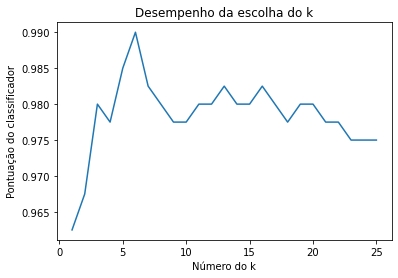

In [ ]:
plt.title('Desempenho da escolha do k')
plt.plot(range(1,26), scores )
plt.xlabel('Número do k')
plt.ylabel('Pontuação do classificador');

plt.savefig('chart.png')

E o melhor valor de k é 6